In [1]:
# エラー関数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# データ(データフレーム)
df = pd.read_csv('fitting.csv')

# print(df)

from scipy import optimize
from sklearn.metrics import r2_score
x = np.arange(0, 5, 0.01)

# def ekusuponensyal(param,x,y):
#     residual = y - param[0]*(1 + np.erf(param[1] * ( x - param[2]) / param[3] ))* 0.5
#     return residual
   
def ekusuponensyal(param,x,y):
    residual = y - 90*(1 + np.erf(param[0] * ( x - 2.8) / param[1] ))* 0.5
    return residual

# 初期値 = [90, np.sqrt(2), 2.8, 8e-1] # 初期値 = [90, np.sqrt(2), 2.8, 8e-1]
初期値 = [np.sqrt(2), 8e-1]

fitParam = optimize.leastsq( ekusuponensyal, 初期値, args=(np.array(df["位置[um]"]), np.array(df["反射光強度[mV]"])) )
# fitResult = 90*(1 + fitParam[0][0] * ( x - fitParam[0][1]) / fitParam[0][2] )* 0.5 # フィットした結果

# fitResult = fitParam[0][0]*(1 + np.erf(fitParam[0][1] * ( x - fitParam[0][2]) / fitParam[0][3]) )* 0.5 # フィットした結果

fitResult = 90*(1 + np.erf(fitParam[0][0] * ( x - 2.8) / fitParam[0][1]) )* 0.5

# R2 = r2_score(df["反射光強度[mV]"], 1/(np.exp(fitParam[0][0]*np.array(df["位置[um]"])) + 1)) # 決定係数
plt.plot(x,fitResult) # フィット
plt.plot(df["位置[um]"],df["反射光強度[mV]"]) # 元データ

# fitSyudo = 90*(1 + np.erf(-np.sqrt(2) * ( x - 2.8) / (8e-1) ) )* 0.5 # 手動
# plt.plot(x,fitSyudo)


# plt.xlim(0, 5)
# plt.ylim([0, 100]) 
print(fitParam[0])

[-327.92803927  335.4674251 ]


決定係数：0.9769487347241217
[ 2.90608524e+00  9.12153029e-03 -6.62947945e-09]


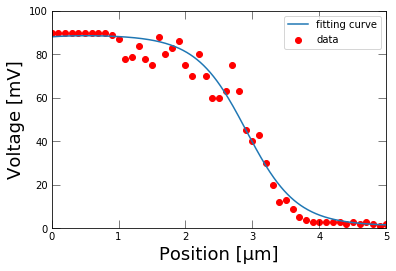

In [27]:
# Marcos 2008 eq.9
import numpy as np
import pandas as pd
import sympy as sy
import matplotlib.pyplot as plt
import os
import math

# データ(データフレーム)
df = pd.read_csv('fitting.csv')

# print(df)

from scipy import optimize
from sklearn.metrics import r2_score
x = np.arange(0, 5, 0.01)

# 定数
w = 5e-3

# --------------------------------------目盛り線の調整-----------------------------------------------------------
plt.gca().xaxis.set_tick_params(which='major', direction='in',bottom=True, top=True, left=True, right=True)
plt.gca().xaxis.set_tick_params(which='minor', direction='in',bottom=False, top=False, left=False, right=False)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
plt.tick_params(which='major', width = 0.5, length = 8)
plt.tick_params(which='minor', width = 0.5, length = 3)
# ---------------------------------------------------------------------------------------------------------

plt.xlim(0, 5) # 横軸範囲設定
plt.ylim([0, 100]) # 縦軸範囲設定
plt.xlabel("Position [μm]", fontsize=18) # 横軸ラベル
plt.ylabel("Voltage [mV]", fontsize=18) # 縦軸ラベル

# param>> 0: x0, 1:a1. 2:a2  
def ekusuponensyal(param,x,y):
    s = np.sqrt(2) * ( x - param[0] ) / w 
    residual = y - 90 / (1 + np.exp(param[1] * s + param[2] * s** 3))
    return residual



# 初期値 = [90, np.sqrt(2), 2.8, 8e-1] # 初期値 = [90, np.sqrt(2), 2.8, 8e-1]
初期値 = [2.8, 0 ,0]
# 初期値 = [2.8, -4e-3 ,0]

fitParam = optimize.leastsq( ekusuponensyal, 初期値, args=(np.array(df["位置[um]"]), np.array(df["反射光強度[mV]"])) )
# fitResult = 90*(1 + fitParam[0][0] * ( x - fitParam[0][1]) / fitParam[0][2] )* 0.5 # フィットした結果

# fitResult = fitParam[0][0]*(1 + np.erf(fitParam[0][1] * ( x - fitParam[0][2]) / fitParam[0][3]) )* 0.5 # フィットした結果

sresult = np.sqrt(2) * ( x - fitParam[0][0] ) / w 
fitResult = 90 / (1 + np.exp(fitParam[0][1] * sresult + fitParam[0][2] * sresult** 3))

xforR2 = np.arange(0, 5.1, 0.1)
# print(xforR2)
sresultforR2 = np.sqrt(2) * ( xforR2 - fitParam[0][0] ) / w 
R2 = r2_score(df["反射光強度[mV]"], 90 / (1 + np.exp(fitParam[0][1] * sresultforR2 + fitParam[0][2] * sresultforR2** 3))) # 決定係数
print("決定係数：{}".format(R2))

plt.plot(x,fitResult,label="fitting curve") # フィット
# plt.plot(df["位置[um]"],df["反射光強度[mV]"]) # 元データ
plt.scatter(df["位置[um]"],df["反射光強度[mV]"],c='red',label="data")

plt.legend()

# fitSyudo = 90*(1 + np.erf(-np.sqrt(2) * ( x - 2.8) / (8e-1) ) )* 0.5 # 手動
# plt.plot(x,fitSyudo)

# plt.xlim(0, 5)
# plt.ylim([0, 100]) 
print(fitParam[0])

90*(-0.318215013750376*sqrt(2)*(xval - 2.90608523812595)**2 + 1.82430605861161*sqrt(2))*exp(-0.106071671250125*sqrt(2)*(xval - 2.90608523812595)**3 + 1.82430605861161*sqrt(2)*(xval - 2.90608523812595))/(exp(-0.106071671250125*sqrt(2)*(xval - 2.90608523812595)**3 + 1.82430605861161*sqrt(2)*(xval - 2.90608523812595)) + 1)**2


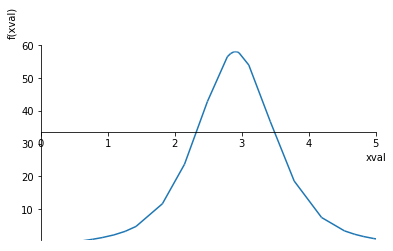

In [28]:
xval = sy.Symbol('xval')

sresultval = sy.sqrt(2) * ( xval - fitParam[0][0] ) / w 
fitResultval = 90 / (1 + sy.exp(fitParam[0][1] * sresultval + fitParam[0][2] * sresultval** 3))

GaussianBeam = - sy.diff(fitResultval)


print(GaussianBeam)

sy.plot(GaussianBeam, xlim=(0,5), ylim=(0.50))

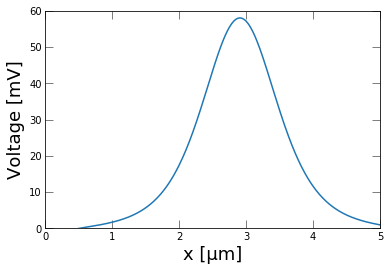

In [41]:
GaussianBeamDX = 90*(-0.318213594224349*np.sqrt(2)*(x - 2.90608528126187)**2 \
    + 1.82430548505015*np.sqrt(2))*np.exp(-0.106071198074783*np.sqrt(2)\
    *(x - 2.90608528126187)**3 + 1.82430548505015*np.sqrt(2)\
    *(x - 2.90608528126187))/(np.exp(-0.106071198074783*np.sqrt(2)\
    *(x - 2.90608528126187)**3 + 1.82430548505015*np.sqrt(2)*(x - 2.90608528126187)) + 1)**2

# --------------------------------------目盛り線の調整-----------------------------------------------------------
plt.gca().xaxis.set_tick_params(which='major', direction='in',bottom=True, top=True, left=True, right=True)
plt.gca().xaxis.set_tick_params(which='minor', direction='in',bottom=False, top=False, left=False, right=False)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
plt.tick_params(which='major', width = 0.5, length = 8)
plt.tick_params(which='minor', width = 0.5, length = 3)
# ---------------------------------------------------------------------------------------------------------

# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, 5) # 横軸範囲設定
plt.ylim([0, 60]) # 縦軸範囲設定
plt.xlabel("x [μm]", fontsize=18) # 横軸ラベル
plt.ylabel("Voltage [mV]", fontsize=18) # 縦軸ラベル
# plt.legend(loc='upper left', fontsize=10)
plt.grid(False) # 正書ではグリッド消す。
plt.plot(x,GaussianBeamDX)
# plt.show() # 描画
plt.savefig("namae.png",bbox_inches="tight",pad_inches=0.0, dpi=600, transparent=True) # 保存

In [2]:
from scipy import optimize
from sklearn.metrics import r2_score
x = np.arange(0, 10, 0.00001) # グラフ描画用
xforR2 = np.array([10, 1, 0.1, 0.01, 0.001]) # 決定係数用



# ---------------------------------------------------------------------------------------------------------
def 二次元フィッティング(param,x,y):
    residual = y - (param[0]*(x**param[1]) + param[2])
    return residual

二次元初期値 = [30, 0.5, 10]

fit2D8HzParam = optimize.leastsq(二次元フィッティング, 二次元初期値, \
                                 args=(np.array(concentration[0:5]), np.array(data8Hz[0:5])))
fit2D8Hz = fit2D8HzParam[0][0]*(x**fit2D8HzParam[0][1]) + fit2D8HzParam[0][2]
# print("8Hz近似直線: y = {}x^{} + {}".format(fit2D8HzParam[0][0], fit2D8HzParam[0][1], fit2D8HzParam[0][2]))
fit2D8HzR2 = r2_score(data8Hz[0:5], fit2D8HzParam[0][0]*(xforR2**fit2D8HzParam[0][1]) + fit2D8HzParam[0][2])
plt.plot(x, fit2D8Hz, color='midnightblue')
# print("R={}".format(fit2D8HzR2))

NameError: name 'np' is not defined

In [ ]:
# --------------------------------------目盛り線の調整-----------------------------------------------------------
# plt.gca().xaxis.set_tick_params(which='major', direction='in',bottom=True, top=True, left=True, right=True)
# plt.gca().xaxis.set_tick_params(which='minor', direction='in',bottom=False, top=False, left=False, right=False)
# plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
# plt.tick_params(which='major', width = 0.5, length = 8)
# plt.tick_params(which='minor', width = 0.5, length = 3)
# ---------------------------------------------------------------------------------------------------------



# --------------------------------------グラフ描画設定-----------------------------------------------------------
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0.001, 10)
# plt.ylim([0, 50])   
# #plt.title("Characteristic of the density")
# plt.xlabel("Concentration[mM]", fontsize=18)
# plt.ylabel("Current [nA]", fontsize=18) # $10^{-1}$
# plt.legend(loc='upper left', fontsize=10)
# plt.grid(False)
# # plt.show()
# os.chdir(r'C:/Users/kammu/kenkyu/修論/図')
# plt.savefig("5.1.3a 有機酵素fit.png",bbox_inches="tight",pad_inches=0.0, dpi=600, transparent=True)
# ---------------------------------------------------------------------------------------------------------